In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names, but IsolationForest was fitted with feature names")
warnings.filterwarnings("ignore", message="Unknown extension is not supported and will be removed")


data = pd.read_excel('data.xlsx')

# Assuming 'time' is a column representing the timestamp of each record, set it as the index
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)

# Convert any non-numeric values to NaN (Not a Number)
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing (NaN) values
data.dropna(inplace=True)

# Select the variables for anomaly detection
variables_to_detect = ['Cyclone_Inlet_Gas_Temp', 'Cyclone_Gas_Outlet_Temp',
                       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
                       'Cyclone_Material_Temp']

# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.01) 

# Fit the model to the selected variables
model.fit(data[variables_to_detect])


data['Anomaly'] = model.predict(data[variables_to_detect])
print("data['Anomaly']===",data['Anomaly'])

num_anomalies = len(data[data['Anomaly'] == -1])
print(f"Number of anomalies: {num_anomalies}")

anomaly_rows = data.index[data['Anomaly'] == -1]
print("Row numbers where anomalies occur:")
print(anomaly_rows)

data['Anomaly']=== time
2017-01-01 00:00:00    1
2017-01-01 00:05:00    1
2017-01-01 00:10:00    1
2017-01-01 00:15:00    1
2017-01-01 00:20:00    1
                      ..
2020-08-07 11:55:00    1
2020-08-07 12:00:00    1
2020-08-07 12:05:00    1
2020-08-07 12:10:00    1
2020-08-07 12:15:00    1
Name: Anomaly, Length: 376124, dtype: int32
Number of anomalies: 3762
Row numbers where anomalies occur:
DatetimeIndex(['2017-01-23 02:40:00', '2017-01-23 02:45:00',
               '2017-01-23 02:50:00', '2017-01-23 02:55:00',
               '2017-01-23 03:00:00', '2017-01-23 03:05:00',
               '2017-01-23 03:10:00', '2017-01-23 03:15:00',
               '2017-01-23 03:20:00', '2017-01-23 03:25:00',
               ...
               '2020-05-17 20:50:00', '2020-05-17 20:55:00',
               '2020-05-17 21:00:00', '2020-07-17 16:35:00',
               '2020-07-17 16:45:00', '2020-07-26 08:00:00',
               '2020-07-26 08:05:00', '2020-07-26 08:10:00',
               '2020-07-26 0

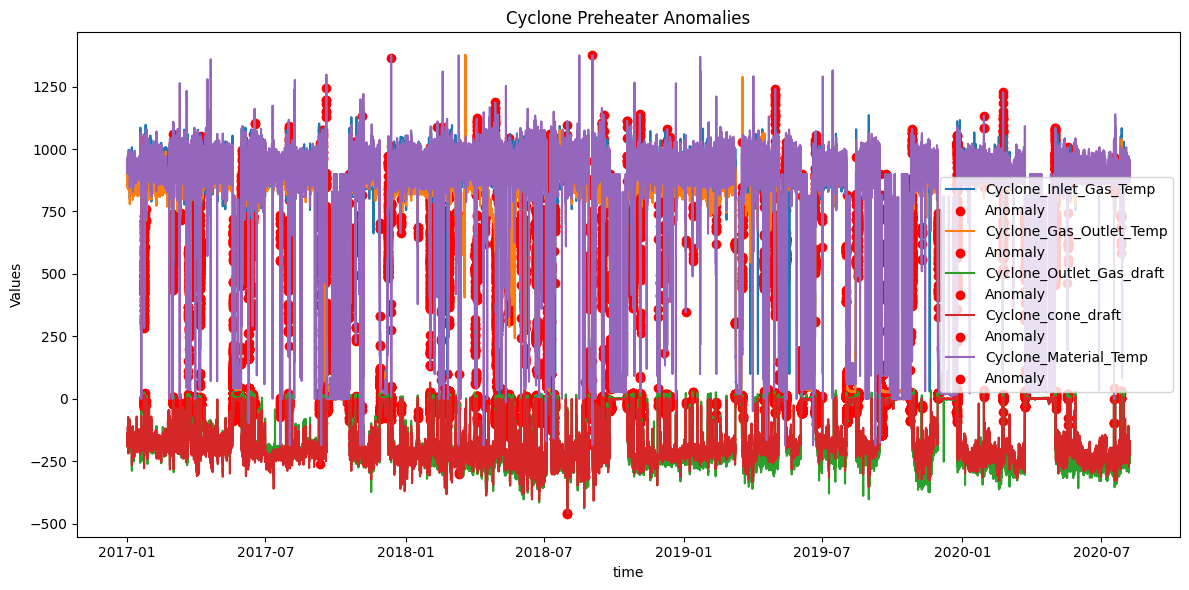

In [3]:
plt.figure(figsize=(12, 6))

# Plot the variables along with the anomalies
for variable in variables_to_detect:
    plt.plot(data.index, data[variable], label=variable)
    plt.scatter(data[data['Anomaly'] == -1].index, data[data['Anomaly'] == -1][variable],
                color='red', label='Anomaly')

plt.xlabel('time')
plt.ylabel('Values')
plt.legend()
plt.title('Cyclone Preheater Anomalies')
plt.tight_layout()
plt.show()